<a href="https://colab.research.google.com/github/JuanSol26/Coderhouse-Solinas/blob/main/Copia_de_Proyecto_Ds_Parte_1_Solinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Producción de carne bovina en Argentina
# **Por Juan Solinas**

#**Motivación y audiencia**

En el siguiente Notebook se analizaran los datos de las actividades ganaderas. El dataset utilizado contiene una serie de datos extraídos del sector bovino de Argentina, correspondientes a las ventas realizadas entre 2015 y 2018. Este sector productivo del país es uno de los más importantes, que tiende a generar un valor agregado en sus exportaciones que se reinvierte nuevamente aquí. Conocer los lugares de mayor exportación y las formas en las que se produce la mayor cantidad de carne bovina, así como poder predecir como se desenvolvera en el futruo tal producción, puede servir como información tanto para una estrategia de negocios que pretenda introducirse en este mercado. También, esta información podría servir para instituciones gubernamentales que pretendan conformar una estrategia con miras a aumentar su importancia en el mercado mundial.

URL de donde se extrajo el dataset: [Producción de Carne Bovina](https://www.kaggle.com/datasets/anggyelarez/produccin-de-carne-bovina-en-argentina)

#**Analisis exploratorio e hipotesis**

Como primer paso exploratorio, en este notebook se intentara detectar la existencia de cierta tendencia a una mayor cantidad de ingresos y de producción de Kg de carne por hectarea según la provincia y el tipo de actividad con la cual se desarrolla esta producción. Además, se intentara descubrir que actividades predominan en el país.

La hipotesis es que se podrá predecir una mayor ingreso neto en los siguientes años para la suma total de actividades basadas en la cría de carne bovina en comparación con los otros tipos de actividad.  





#**Glosario de Variables**


1.   País

2.   Provincia

3.   Departamento: Localidad de la provincia de la que se trata)

4.   Año

5.   Modelo: Tipo de modelo de producción de carne que se implementa)

6.   Actividad: Tipo de actividad en la cual se produce la Carne Bovina)

7.  Margen Bruto ($/Ha): Total de ganancia por hectarea sin contar los costos indirectos.

8. Resultado neto ($/ha): Total de ganancia total por hectarea, luego de descontados todos los gastos.

9. Ingreso neto ($/ha): Total de ingresos percibidos por hectarea, calculando las ventas de la carne producida sin descontar los costos.

10. Gastos directos ($/ha): Costos de producción por hectarea, sin contar gastos externos a la empresa.

11. Costos indirectos ($/ha): Costos indirectos por hectarea, calculando solo los gastos ajenos a la empresa, como impuestos, etc.

12. Eficiencia stock(%):  Estimación de los kg de producción que se extraen para la venta por cada 100 kg de existencia. Es un porcentaje sobre el total de lo producido.

13. Producción (kg/ha): Cantidad de Kg de carne bovina producidos por hectarea de la empresa.

14. Carga (kg/ha): Es la cantidad total de animales por hectarea, calculada en una sumatoria de kg por hectarea.



**ACLARACIÓN**

--La denominación "Ha" es una abreviación de Hectareas.

--Los tipos de actividad son:

Cria: Se basa en la cria de Vacas para que tengan terneros y de ahí producir carne bovina.

Ciclo completo: Se basa en la cria de vacas para que tengan terneros y además de desarrollar su alimentación con miras a engordar a los animales para vender la carne bovina.

Invernada: Se basa en la alimentación de los terneros para vender la carne bovina.

#**Estructuración de los datos**

In [ ]:
#Importación de CSV de GitHub
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/JuanSol26/Coderhouse-Solinas/main/produccion-de-carne-bovina%20(1).csv"

df_carne = pd.read_csv (url,  encoding='ISO-8859-1', sep= ";")


In [ ]:
#Renombro las columnas y clasifico 4 para poder eliminarlas.
df_carne = df_carne.rename(columns= {"pais": "País", "provincia": "Provincia", "departamento": "Departamento", "año": "Año", "margen_bruto_($/ha)" : "Margen bruto ($/ha)", "resultado_neto_($/ha)": "Resultado neto ($/ha)", "ingreso_neto_($/ha)": "Ingreso neto ($/ha)", "gastos_directos_($/ha)": "Gastos directos ($/ha)", "costos_indirectos_($/ha)": "Costos indirectos ($/ha)", "eficiencia_stock_(%)": "Eficiencia stock(%)","producción_(kg/ha)": "Producción (kg/ha)", "destete_(%)": "Eliminar1", "carga_(kg/ha)": "Carga (kg/ha)", "Unnamed: 15": "Eliminar2", "Unnamed: 16": "Eliminar3", "Unnamed: 17": "Eliminar4"})


In [ ]:
df_carne.head()

,País,Provincia,Departamento,Año,modelo,actividad,Margen bruto ($/ha),Resultado neto ($/ha),Ingreso neto ($/ha),Gastos directos ($/ha),Costos indirectos ($/ha),Eficiencia stock(%),Producción (kg/ha),Eliminar1,Carga (kg/ha),Eliminar2,Eliminar3,Eliminar4
0,Argentina,Buenos Aires,Bolivar,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
1,Argentina,Buenos Aires,Daireaux,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
2,Argentina,Buenos Aires,Coronel Suarez,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
3,Argentina,Cordoba,General San Martin,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,65,436,NaN,NaN,NaN
4,Argentina,Cordoba,Juarez Celman,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,65,436,NaN,NaN,NaN


In [ ]:
#Eliminación de columnas que no se utilizaran en el analisis
df_carne = df_carne.drop ("Eliminar1",axis=1)
df_carne = df_carne.drop("Eliminar2", axis=1)
df_carne = df_carne.drop("Eliminar3", axis=1)
df_carne = df_carne.drop("Eliminar4", axis=1)


In [ ]:
df_carne.head()

,País,Provincia,Departamento,Año,modelo,actividad,Margen bruto ($/ha),Resultado neto ($/ha),Ingreso neto ($/ha),Gastos directos ($/ha),Costos indirectos ($/ha),Eficiencia stock(%),Producción (kg/ha),Carga (kg/ha)
0,Argentina,Buenos Aires,Bolivar,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336
1,Argentina,Buenos Aires,Daireaux,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336
2,Argentina,Buenos Aires,Coronel Suarez,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336
3,Argentina,Cordoba,General San Martin,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,436
4,Argentina,Cordoba,Juarez Celman,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,436


In [ ]:
df_carne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   País                      2598 non-null   object
 1   Provincia                 2598 non-null   object
 2   Departamento              2598 non-null   object
 3   Año                       2598 non-null   int64 
 4   modelo                    2598 non-null   object
 5   actividad                 2598 non-null   object
 6   Margen bruto ($/ha)       2598 non-null   int64 
 7   Resultado neto ($/ha)     2598 non-null   int64 
 8   Ingreso neto ($/ha)       2598 non-null   int64 
 9   Gastos directos ($/ha)    2598 non-null   int64 
 10  Costos indirectos ($/ha)  2598 non-null   int64 
 11  Eficiencia stock(%)       2598 non-null   int64 
 12  Producción (kg/ha)        2598 non-null   int64 
 13  Carga (kg/ha)             2598 non-null   int64 
dtypes: int64(9), object(5)
m

In [ ]:
#modificación de categoría año para que sea considerada como una variable categorica y no como una variable continua.
df_carne["Año"]= df_carne ["Año"].astype("category")

In [ ]:
df_carne.describe().round(2)

,Margen bruto ($/ha),Resultado neto ($/ha),Ingreso neto ($/ha),Gastos directos ($/ha),Costos indirectos ($/ha),Eficiencia stock(%),Producción (kg/ha),Carga (kg/ha)
count,2598.00,2598.00,2598.00,2598.00,2598.00,2598.00,2598.00,2598.00
mean,1001.08,414.79,1585.56,584.46,586.32,32.76,78.71,209.24
std,725.41,532.00,1344.48,864.81,486.09,9.40,76.29,134.13
min,-107.00,-1299.00,205.00,46.00,75.00,20.00,7.00,19.00
25%,477.00,119.00,664.00,137.00,241.00,27.00,28.00,101.00
50%,645.00,241.00,1013.00,228.00,401.00,31.00,46.00,182.00
75%,1400.00,750.00,2286.00,423.00,777.00,35.00,92.00,293.00
max,3148.00,1761.00,5980.00,4424.00,2522.00,59.00,284.00,492.00


In [ ]:
df_carne.describe(include= "object")

,País,Provincia,Departamento,modelo,actividad
count,2598,2598,2598,2598,2598
unique,1,13,199,21,3
top,Argentina,Buenos Aires,Capital,cuenca del salado,cria
freq,2598,588,60,444,1800


In [ ]:
#Cantidad total de unidades productoras por provincia
df_carne.Provincia.value_counts()

Provincia
Buenos Aires           588
Cordoba                312
Chaco                  300
Santiago Del Estero    264
La Pampa               240
Entre Rios             204
Corrientes             190
Salta                  144
Santa Fe               132
San Luis               108
Formosa                 96
Chubut                  12
Rio Negro                8
Name: count, dtype: int64

In [ ]:
#Cantidad total de tipos de modelo
df_carne.modelo.value_counts()

modelo
cuenca del salado               444
pampeana subhumeda              276
chaco-formosa este              252
santiago del estero             252
cordoba norte                   180
salta                           144
corrientes noroeste             144
entre rios sw                   132
santa fe centro                 132
la pampa-san luis arida         132
centro cordoba sur              108
chaco humedo                     84
la pampa-san luis semiarida      72
entre rios norte                 60
chaco-formosa oeste              60
corrientes centro sur            40
buenos aires centro-sudoeste     36
corrientes nor-este              18
islas de entre rios 1            12
patagonia - precordillera        12
patagonia - monte oriental        8
Name: count, dtype: int64

In [ ]:
#Cantidad total de unidades productoras según su tipo de actividad
df_carne.actividad.value_counts()

actividad
cria              1800
invernada          432
ciclo completo     366
Name: count, dtype: int64

In [ ]:
#Creación de variable que calcule los gastos totales
Gastos = df_carne["Gastos directos ($/ha)"] + df_carne["Costos indirectos ($/ha)"]

print (Gastos)

0       3527
1       3527
2       3527
3       4453
4       4453
        ... 
2593     343
2594     343
2595     343
2596     343
2597     639
Length: 2598, dtype: int64


In [ ]:
#Incorporación de variable gastos como columna al DataFrame
df_carne2 = df_carne
df_carne2 = df_carne2.assign (Gastos= Gastos)

df_carne2.head()



,País,Provincia,Departamento,Año,modelo,actividad,Margen bruto ($/ha),Resultado neto ($/ha),Ingreso neto ($/ha),Gastos directos ($/ha),Costos indirectos ($/ha),Eficiencia stock(%),Producción (kg/ha),Carga (kg/ha),Gastos
0,Argentina,Buenos Aires,Bolivar,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336,3527
1,Argentina,Buenos Aires,Daireaux,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336,3527
2,Argentina,Buenos Aires,Coronel Suarez,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336,3527
3,Argentina,Cordoba,General San Martin,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,436,4453
4,Argentina,Cordoba,Juarez Celman,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,436,4453


#**Analisis exploratorio de Datos**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


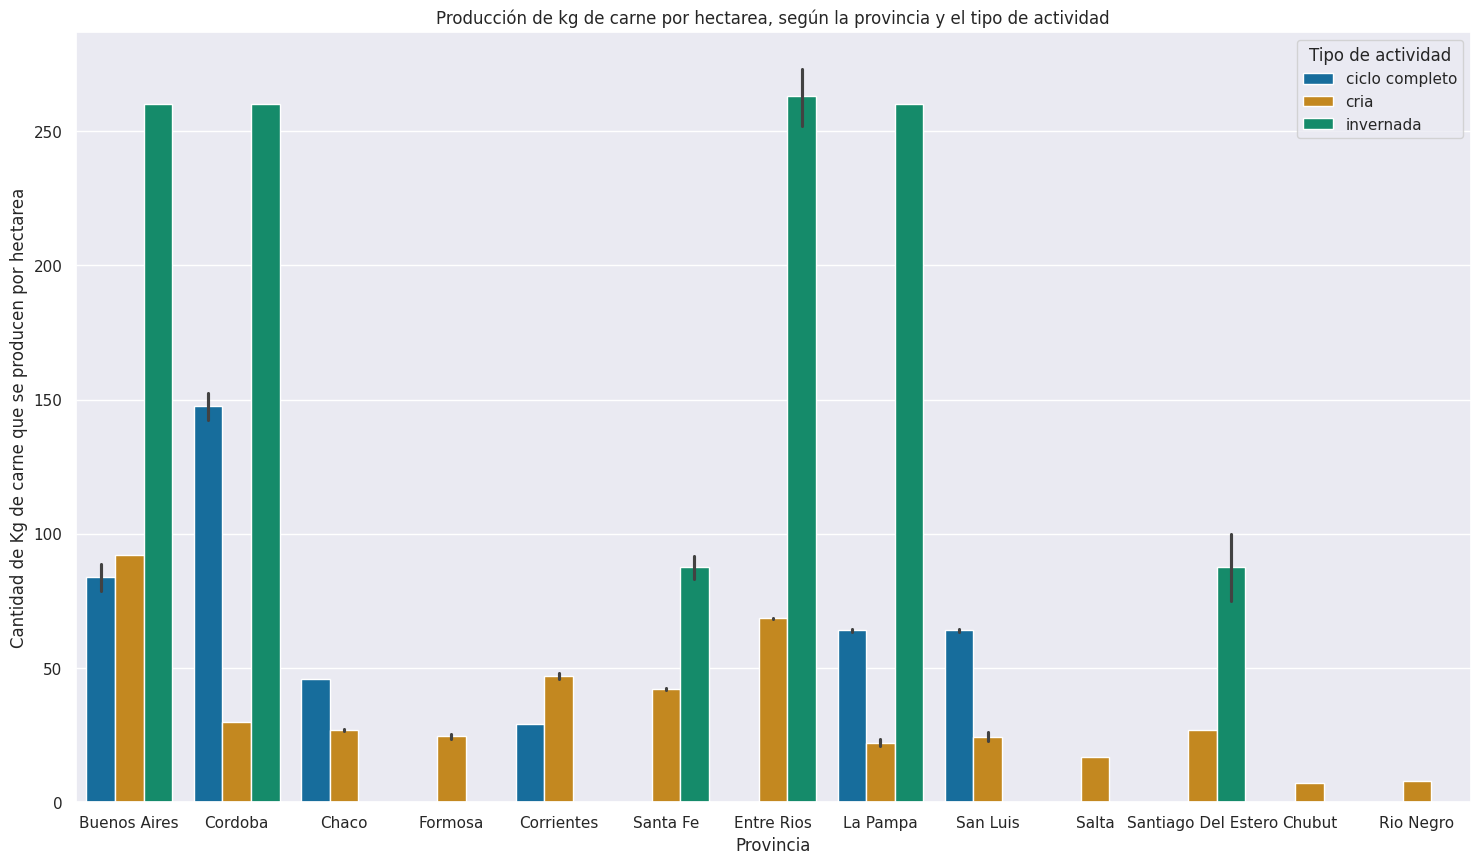

In [ ]:
##Gráfico de barras para comparar la producción de kg de carne.
plt.figure (figsize=(18,10))
sns.set_theme(style="darkgrid")
sns.barplot (data=df_carne, x="Provincia", y="Producción (kg/ha)", hue="actividad", palette="colorblind")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Kg de carne que se producen por hectarea")
plt.title("Producción de kg de carne por hectarea, según la provincia y tipo de actividad")
plt.legend(title= "Tipo de actividad")

plt.show()

In [ ]:
#Valor maximo de producción de Kg de carne por provincia
max_prod = df_carne.groupby("Provincia")["Producción (kg/ha)"].max().round(2)

max_prod.sort_values(inplace=True)

max_prod

Provincia
Chubut                   7
Rio Negro                8
Salta                   17
Formosa                 28
Chaco                   46
Corrientes              63
San Luis                65
Santa Fe               125
Santiago Del Estero    125
Buenos Aires           260
Cordoba                260
La Pampa               260
Entre Rios             284
Name: Producción (kg/ha), dtype: int64

In [ ]:
#media de kg de carne producidos por provincia
mean_prod = df_carne.groupby("Provincia")["Producción (kg/ha)"].mean().round(2)

mean_prod.sort_values(inplace=True)

mean_prod

Provincia
Chubut                   7.00
Rio Negro                8.00
Salta                   17.00
Formosa                 24.62
Santiago Del Estero     29.75
Chaco                   32.32
San Luis                33.11
Corrientes              45.31
Santa Fe                83.38
Cordoba                 84.12
Buenos Aires           104.39
La Pampa               121.45
Entre Rios             205.94
Name: Producción (kg/ha), dtype: float64

In [ ]:
#Valor medio de producción de Kg de carne por tipo de actividad
mean_prod_act = df_carne.groupby("actividad")["Producción (kg/ha)"].mean().round(2)

mean_prod_act.sort_values(inplace=True)

mean_prod_act

actividad
cria               45.13
ciclo completo     90.80
invernada         208.36
Name: Producción (kg/ha), dtype: float64

In [ ]:
#Suma de kg de carne producidos por provincia
sum_prod = df_carne.groupby("Provincia")["Producción (kg/ha)"].sum().round(2)

sum_prod.sort_values (inplace=True)

sum_prod

Provincia
Rio Negro                 64
Chubut                    84
Formosa                 2364
Salta                   2448
San Luis                3576
Santiago Del Estero     7854
Corrientes              8608
Chaco                   9696
Santa Fe               11006
Cordoba                26244
La Pampa               29148
Entre Rios             42012
Buenos Aires           61380
Name: Producción (kg/ha), dtype: int64

**Observando el gráfico de barras, así como los codigos ejecutados para
verificar el valor maximo y la media de tales variables, podemos considerar que la mayor producción de Kg de carne se da en la provincia de Entre Ríos. Tanto su producción maxima como su media se encuentra holgadamente por encima de las demás provincias.**

**La siguen La Pampa, Buenos Aires y Cordoba.**

**La mayor producción de carne bovina se da en la actividad de tipo de "Invernada", seguida luego por la actividad de Ciclo completo y finalmente de Cria. De todas maneras esta relación no es univoca en todas las provincias, ya que en provincias como Buenos Aires o Corrientes existe una mayor cantidad de producción de Kg por medio de la actividad "Cria" que por el "ciclo completo".**

**Además, cabe decir que si bien Entre ríos cuenta con una mayor producción de kg de Carne en promedio, en Buenos Aires hay una mayor diversidad en las actividades de producción, tendiendo a producir en total mayor cantidad de kg de Carne en comparación con Entre Ríos.**





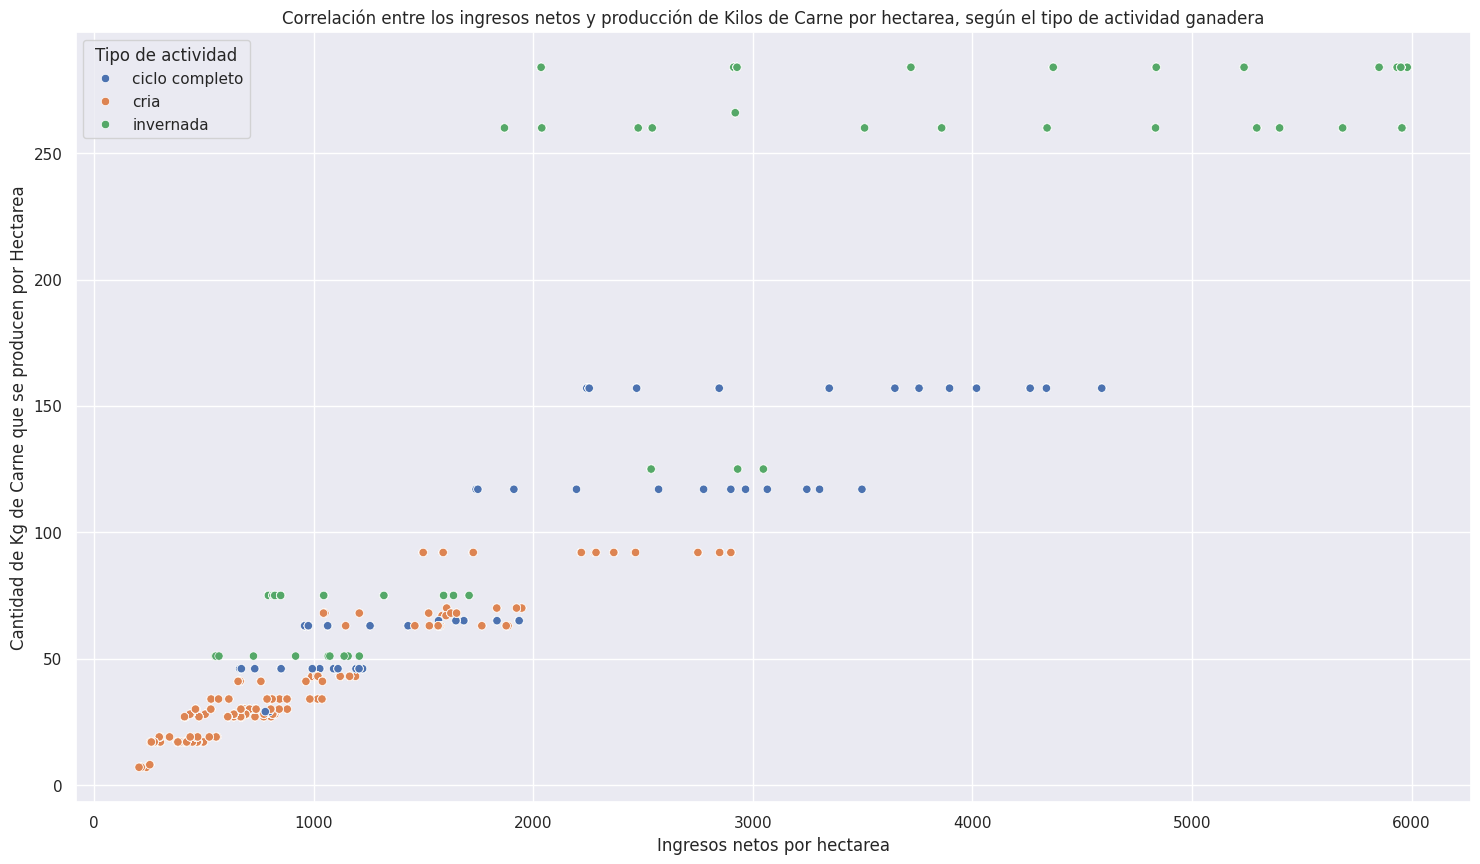

In [ ]:
##Gráfico de dispersión de los ingresos netos y producción de kg de carne según el tipo de actividad ganadera.
plt.figure (figsize=(18,10))
sns.set_theme(style="darkgrid")
sns.scatterplot (data=df_carne, x="Ingreso neto ($/ha)", y="Producción (kg/ha)", hue="actividad")
plt.xlabel("Ingresos netos por hectarea")
plt.ylabel("Cantidad de Kg de Carne que se producen por Hectarea")
plt.title("Correlación entre los ingresos netos y producción de Kilos de Carne por hectarea, según el tipo de actividad ganadera")
plt.legend(title= "Tipo de actividad")

plt.show()


In [ ]:
#media de ingresos netos según tipo de actividad ganadera.
mean_ing = df_carne.groupby("actividad")["Ingreso neto ($/ha)"].mean().round(2)

mean_ing.sort_values(inplace=True)
mean_ing

actividad
cria              1084.96
ciclo completo    2034.77
invernada         3290.78
Name: Ingreso neto ($/ha), dtype: float64

**Como lógicamente se podía presuponer, siguiendo lo indicado por este gráfico de dispersión y por la media de ingresos luego verificada, existe una tendencia a tener mayores ingresos para la producción "Invernada", probablemente por la cantidad de kg de carne que producen.**

**De todas maneras, esa relación no es absoluta, ya que hay varias producciones que utilizan un tipo de producción de "Ciclo completo" que poseen un mayor ingreso neto a pesar de tener menor producción de kg de carne por hectarea en comparación.**

**Igualmente, se puede verificar que la actividad de "Cria" tiende a tener menores ingresos, probablemente por esta tendencia de producir menos cantidad de kg de carne.**

<ipython-input-99-28cec6cc8810>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (data=df_carne, x="Ingreso neto ($/ha)", y="actividad", palette = "tab10")


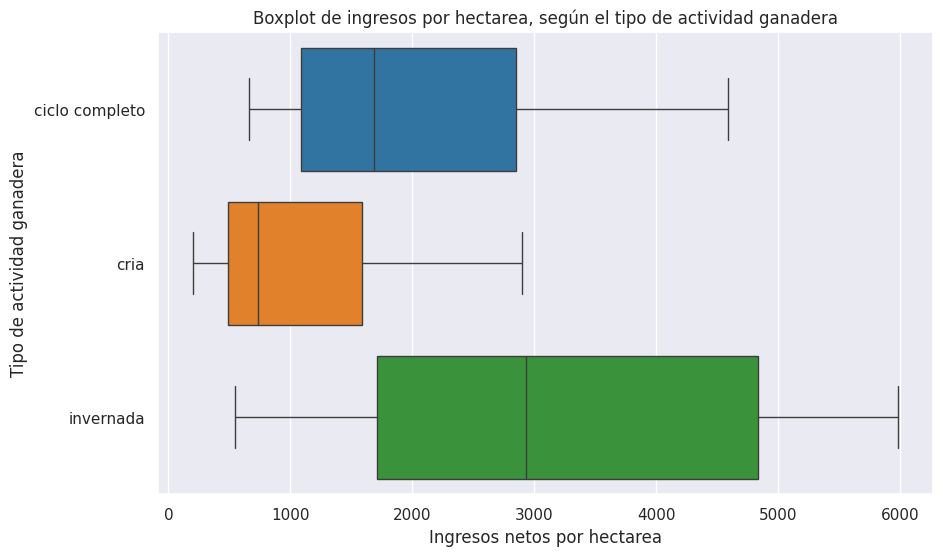

In [ ]:
##boxplot de ingresos netos por hectarea según tipo de actividad ganadera
plt.figure (figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.boxplot (data=df_carne, x="Ingreso neto ($/ha)", y="actividad", palette = "tab10")
plt.xlabel("Ingresos netos por hectarea")
plt.ylabel("Tipo de actividad ganadera")
plt.title("Boxplot de ingresos por hectarea, según el tipo de actividad ganadera")
plt.show()


**Para complementar el gráfico de dispersión anterior y poder comprender mejor la distribución de ingresos netos por hectarea, se hicieron estos tres boxplots según el tipo de actividad.**

**Como se observa, el ingreso neto más bajo lo detenta la actividad "Cria" y el ingreso neto máximo lo detenta la actividad "Invernada".**

**Asimismo, la mediana de los ingresos por hectarea de la actividad "cria" es menor a los 1000 pesos por hectarea, la mediana de ingresos de la actividad "Ciclo completo" es menor a 2000 pesos por hectarea, mientras que la mediana de ingresos de la actividad "Invernada" se ubica casi en los 3000 pesos por hectarea**

<ipython-input-269-9a1486848676>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (data=df_carne2, x="Gastos", y= "actividad",ax=axs[0], palette= "tab10")


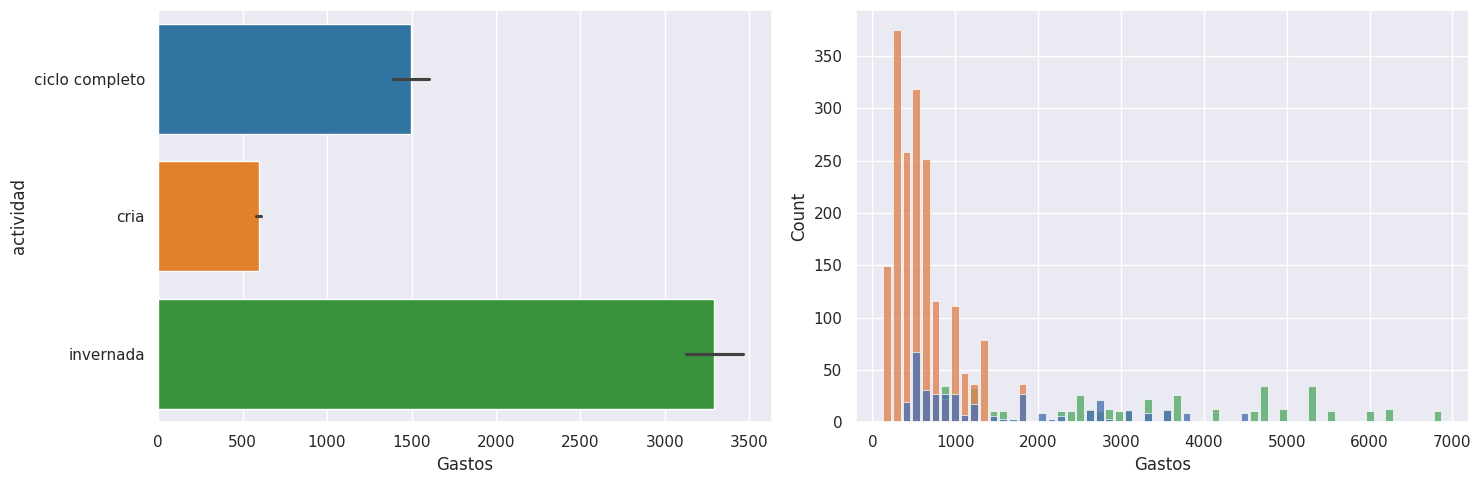

In [ ]:
##gráfico de barras e histograma del calculo de gastos según el tipo de actividad
f,axs= plt.subplots (1,2,figsize=(15,5), gridspec_kw=dict(width_ratios=[10,10]))
sns.set_theme(style="darkgrid")
sns.barplot (data=df_carne2, x="Gastos", y= "actividad",ax=axs[0], palette= "tab10")
sns.histplot (data=df_carne2,x="Gastos", hue= "actividad", shrink=.8,alpha=.8, legend = False, ax=axs[1])
f.tight_layout()
plt.show()


In [ ]:
#media de gastos por tipo de actividad
media_gastos_act = df_carne2.groupby("actividad")["Gastos"].mean().round(2)

print (media_gastos_act)

actividad
ciclo completo    1498.08
cria               596.05
invernada         3288.16
Name: Gastos, dtype: float64


In [ ]:
#mediana de gastos por tipo de actividad
median_gastos_act = df_carne2.groupby("actividad")["Gastos"].median().round(2)

print (median_gastos_act)

actividad
ciclo completo    1011.0
cria               513.0
invernada         3039.0
Name: Gastos, dtype: float64


In [ ]:
#gastos maximos por tipo de actividad
max_gastos_act = df_carne2.groupby("actividad")["Gastos"].max().round(2)

print (max_gastos_act)

actividad
ciclo completo    4453
cria              1754
invernada         6878
Name: Gastos, dtype: int64


In [ ]:
#Conteo de establecimientos por tipo de actividad
count_act = df_carne2.groupby("actividad")["Provincia"].count()

print (count_act)

actividad
ciclo completo     366
cria              1800
invernada          432
Name: Provincia, dtype: int64


**Siguiendo los dos gráficos plasmados, así como los calculos de media, mediana y moda en relación a los gastos totales de los diferentes tipos de producción, resulta mucho más barata la actividad de "Cría" que la de "Invernada" y "Ciclo completo", lo que explicaría la mayor cantidad de establecimientos de Cria en comparación con el de invernada**